# Marketing Analytics

---

<h2>2) ANÁLISE EXPLORATÓRIA DOS DADOS</h2>

<h2>2.0) Importações</h2>

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go

import warnings
warnings.filterwarnings("ignore")


import plotly.express as px

<h2>2.1) Visão Geral</h2>

In [2]:
df = pd.read_csv('data/compras.txt', sep='\t', header=None)
df.columns = ['client_id', 'value', 'date']

In [3]:
weekday_map = {
    0: 'monday',
    1: 'tuesday',
    2: 'wednesday',
    3: 'thursday',
    4: 'friday',
    5: 'saturday',
    6: 'sunday'
}

In [4]:
df['date'] = pd.to_datetime(df['date'])

df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year
df['day_week'] = df['date'].dt.dayofweek
df['week'] = df['date'].dt.weekofyear
df['day_week_name'] = df['day_week'].map(weekday_map)

In [5]:
df.head()

client_id  value       date  day  month  year  day_week  week day_week_name
0        760   25.0 2009-11-06    6     11  2009         4    45        friday
1        860   50.0 2012-09-28   28      9  2012         4    39        friday
2       1200  100.0 2005-10-25   25     10  2005         1    43       tuesday
3       1420   50.0 2009-07-09    9      7  2009         3    28      thursday
4       1940   70.0 2013-01-25   25      1  2013         4     4        friday

In [6]:
df.describe().T

count           mean           std     min      25%       50%  \
client_id  51243.0  108934.547938  67650.610139    10.0  57720.0  102440.0   
value      51243.0      62.337195    156.606801     5.0     25.0      30.0   
day        51243.0      18.157992      9.259684     1.0     10.0      19.0   
month      51243.0       8.395761      3.526799     1.0      5.0      10.0   
year       51243.0    2010.869699      2.883072  2005.0   2009.0    2011.0   
day_week   51243.0       3.106044      1.420202     0.0      2.0       3.0   
week       51243.0      32.205491     16.857996     1.0     17.0      38.0   

                75%       max  
client_id  160525.0  264200.0  
value          60.0    4500.0  
day            26.0      31.0  
month          12.0      12.0  
year         2013.0    2015.0  
day_week        4.0       6.0  
week           48.0      53.0

In [7]:
df.shape

(51243, 9)

In [8]:
df.isnull().sum()

client_id        0
value            0
date             0
day              0
month            0
year             0
day_week         0
week             0
day_week_name    0
dtype: int64

<h2>2.2) Análise por atributo individual</h2>

<h3>2.2.1) Cliente (client_id)</h2>

In [9]:
df_client = df.copy()
df_client = pd.DataFrame(df_client.groupby('client_id', as_index=False)['value'].count().sort_values(by='value', ascending=False)).head(20)
df_client['client_id'] = df_client['client_id'].astype(str)
df_client.head(5)

client_id  value
457       9720     45
6978    109370     41
7868    119430     38
534      10720     37
526      10640     34

In [10]:
fig = px.bar(x=df_client['client_id'], y=df_client['value'].values, text=df_client['value'].values)

fig.update_layout(
    title='<span>Quantidade de compras por clientes (Top 20)</span>', 
    autosize=False,
    width=1200,
    height=400,
    yaxis=dict(title='<span>Quantidade</span>'),
    xaxis=dict(title='<span>Clientes</span>')
)

fig.show()

In [11]:
df_client = df.copy()
df_client = df_client.groupby(['client_id'], as_index=False)['value'].sum().sort_values(by='value', ascending=False).head(20)
df_client['client_id'] = df_client['client_id'].astype(str)
df_client.head(5)

client_id    value
734       13610  24350.0
9913     144610  17000.0
6020      98550  15507.0
11383    164930  14000.0
9621     141340  13351.0

In [12]:
fig = px.bar(x=df_client['client_id'], y=df_client['value'].values, text=df_client['value'].values)

fig.update_layout(
    title='<span>Clientes que mais gastaram na loja (Top 20)</span>', 
    autosize=False,
    width=1200,
    height=400,
    yaxis=dict(title='<span>Valor $</span>'),
    xaxis=dict(title='<span>Clientes</span>')
)

fig.show()

<h3>2.2.1) Valores (value)</h2>

In [13]:
df_value = df.copy()
df_value['value'].describe()

count    51243.000000
mean        62.337195
std        156.606801
min          5.000000
25%         25.000000
50%         30.000000
75%         60.000000
max       4500.000000
Name: value, dtype: float64

In [14]:
fig = px.box(df_value, y='value')

fig.update_layout(
    title='<span>Boxplot para verificar outliers</span>', 
    autosize=False,
    width=600,
    height=600,
)

fig.show()

[Text(0.5, 1.0, 'Histograma de valores (sem outliers)')]

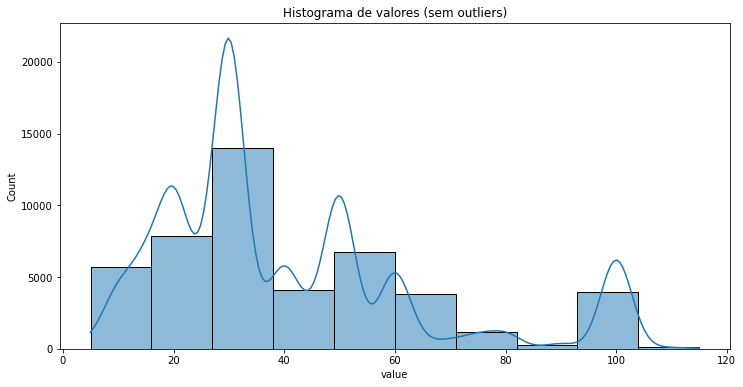

In [15]:
df_value_filter = df_value.loc[df_value['value'] <= 115]

plt.figure(figsize=(12, 6))
sns.histplot(df_value_filter['value'], kde=True, bins=10).set(title='Histograma de valores (sem outliers)')

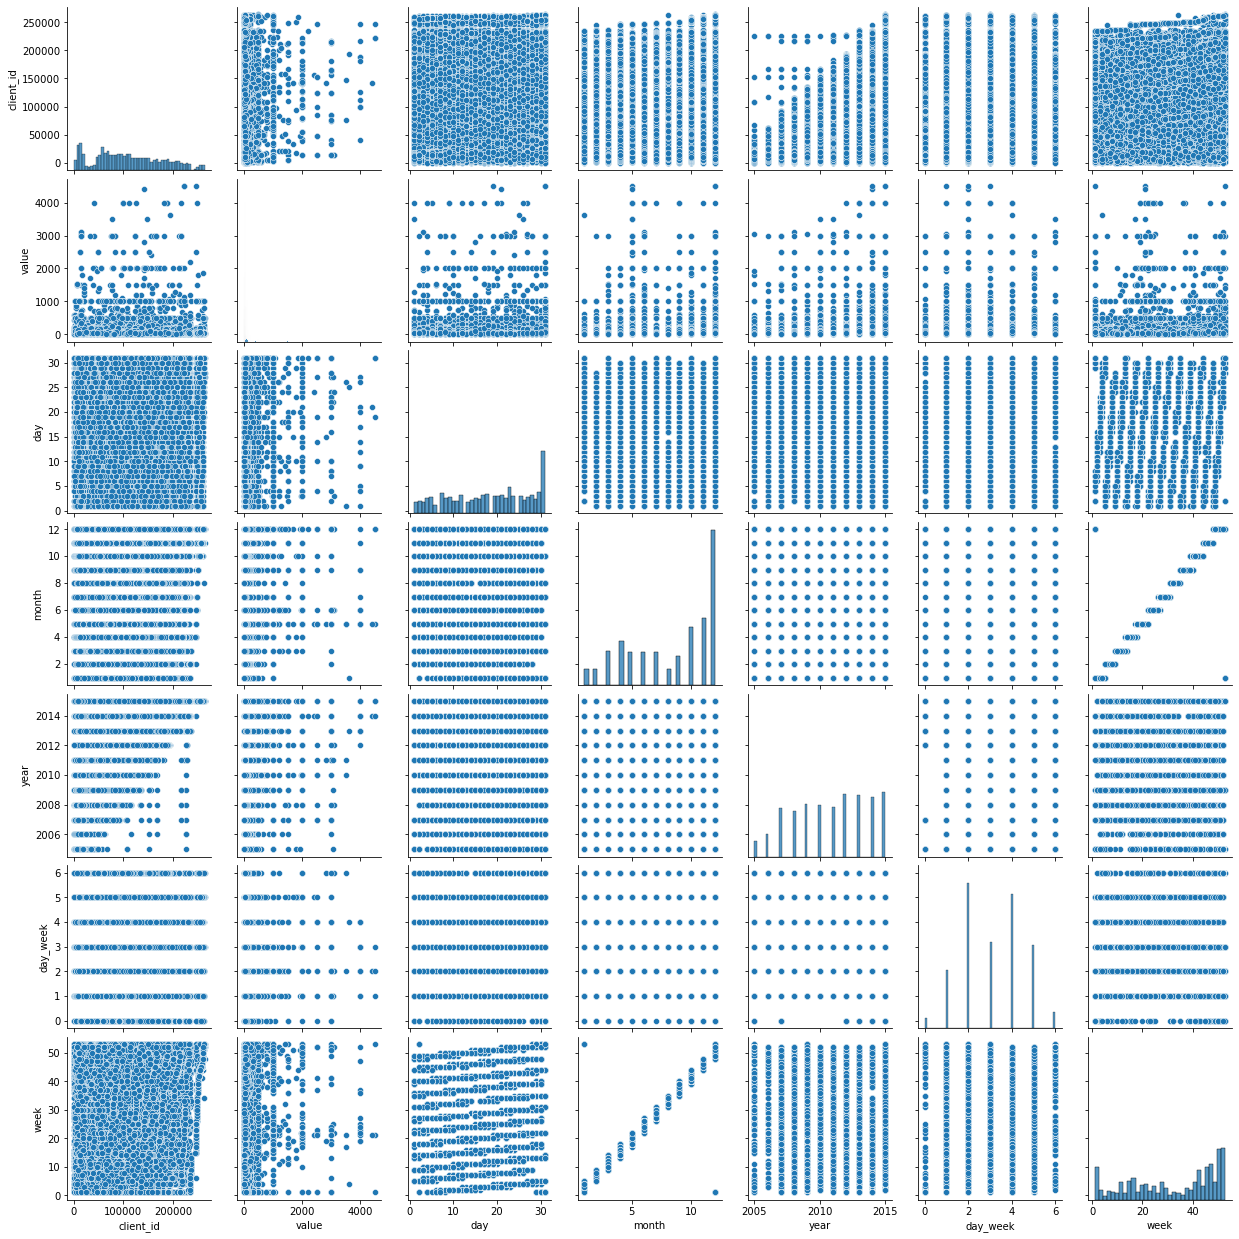

In [16]:
sns.pairplot(df_value)

[Text(0.5, 1.0, 'Matriz de Correlação')]

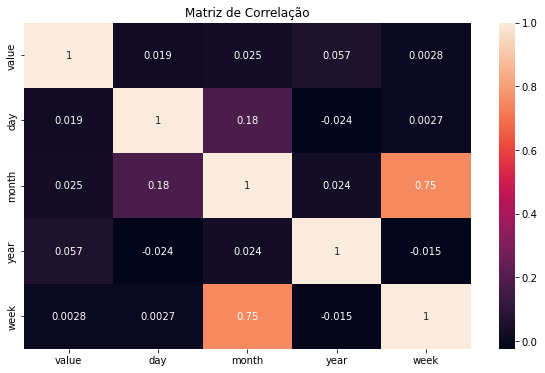

In [17]:
df_value_filter = df_value[['value', 'day', 'month', 'year', 'week']].corr()

plt.figure(figsize=(10,6))
sns.heatmap(df_value_filter, annot=True).set(title='Matriz de Correlação')

<h3>2.2.3) Ano (year)

In [18]:
df_year = df.copy()
df_year = df.groupby(['year'], as_index=False)['value'].count().sort_values(by='year', ascending=True)
df_year['year'] = df_year['year'].astype(str)
df_year.sort_values(by='value', ascending=False)

year  value
10  2015   6197
7   2012   5960
8   2013   5912
9   2014   5739
4   2009   5054
5   2010   4939
6   2011   4785
2   2007   4674
3   2008   4331
1   2006   2182
0   2005   1470

In [19]:
fig = px.bar(x=df_year['year'], y=df_year['value'].values, text=df_year['value'].values)

fig.update_layout(
    title='<span>Quantidade de vendas por ano</span>', 
    autosize=False,
    width=1200,
    height=400,
    yaxis=dict(title='<span>Quantidade</span>'),
    xaxis=dict(title='<span>Anos</span>')
)

fig.show()

In [20]:
df_year = df.copy()
df_year = df.groupby(['year'], as_index=False)['value'].sum().sort_values(by='year', ascending=True)
df_year['year'] = df_year['year'].astype(str)
df_year.sort_values(by='value', ascending=False)

year      value
10  2015  478394.13
9   2014  432665.20
8   2013  401610.18
7   2012  374963.34
6   2011  303939.85
5   2010  290116.92
4   2009  256466.51
2   2007  230260.00
3   2008  229853.88
1   2006  114010.49
0   2005   82064.40

In [21]:
fig = px.bar(x=df_year['year'], y=df_year['value'].values, text=df_year['value'].values)

fig.update_layout(
    title='<span>Valor total de vendas por ano</span>', 
    autosize=False,
    width=1200,
    height=400,
    yaxis=dict(title='<span>Valor $</span>'),
    xaxis=dict(title='<span>Anos</span>')
)

fig.show()

<h3>2.2.4) Mês (month)</h3>

In [22]:
month_map = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
    7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

In [23]:
df_month = df.copy()
df_month = df_month.groupby(['month'], as_index=False)['value'].count()
df_month['month_name'] = df_month['month'].map(month_map)

df_month.sort_values(by='value', ascending=False)

month  value month_name
11     12  14888   December
10     11   6384   November
9      10   5570    October
3       4   4234      April
2       3   3278      March
4       5   3206        May
6       7   3159       July
5       6   3126       June
8       9   2768  September
1       2   1562   February
7       8   1553     August
0       1   1515    January

In [24]:
fig = px.bar(df_month, x='month_name', y='value', text='value')

fig.update_layout(
    title='<span>Quantidade de vendas por mês</span>', 
    autosize=False,
    width=1200,
    height=400,
    yaxis=dict(title='<span>Quantidade</span>'),
    xaxis=dict(title='<span>Meses</span>')
)

fig.show()

In [25]:
df_month = df.copy()
df_month = df_month.groupby(['month'], as_index=False)['value'].sum()
df_month['month_name'] = df_month['month'].map(month_map)

df_month.sort_values(by='value', ascending=False)

month       value month_name
11     12  1068698.89   December
10     11   351456.99   November
9      10   303177.34    October
4       5   279160.43        May
5       6   219930.37       June
3       4   214535.13      April
8       9   190297.85  September
2       3   169040.47      March
6       7   165185.74       July
1       2    80822.48   February
0       1    76192.36    January
7       8    75846.85     August

In [26]:
fig = px.bar(df_month, x='month_name', y='value', text='value')

fig.update_layout(
    title='<span>Quantidade de vendas por mês</span>', 
    autosize=False,
    width=1200,
    height=400,
    yaxis=dict(title='<span>Quantidade</span>'),
    xaxis=dict(title='<span>Meses</span>')
)

fig.show()

<h3>2.2.5) Dia do mês (day) e mês (month)</h3>

In [27]:
df_day = df.copy()
df_day = df_day.groupby(['day', 'month'], as_index=False)['value'].agg(['count', 'sum'])

df_day.reset_index().head(10).sort_values(by='count', ascending=False)

day  month  count      sum
4    1      6    164  8905.00
1    1      3    117  5300.00
8    1     10     99  7522.00
5    1      7     84  8720.00
2    1      4     80  3500.00
7    1      9     59  4275.24
0    1      2     34  2660.00
6    1      8     26  2241.00
9    1     11      3   280.00
3    1      5      2  3550.00

In [28]:
df_day.reset_index().head(10).sort_values(by='sum', ascending=False)

day  month  count      sum
4    1      6    164  8905.00
5    1      7     84  8720.00
8    1     10     99  7522.00
1    1      3    117  5300.00
7    1      9     59  4275.24
3    1      5      2  3550.00
2    1      4     80  3500.00
0    1      2     34  2660.00
6    1      8     26  2241.00
9    1     11      3   280.00

<h3>2.2.6) Dia da semana (day_week e day_week_name)</h3>

In [29]:
df_day = df.copy()
df_day = df_day.groupby(['day_week_name', 'day_week'], as_index=False)['value'].agg(['count', 'sum'])

df_day.sort_values(by='count', ascending=False)

count        sum
day_week_name day_week                  
wednesday     2         13970  832852.47
friday        4         12828  727430.95
thursday      3          8292  560034.88
saturday      5          8023  481037.66
tuesday       1          5626  403088.66
sunday        6          1549  107991.28
monday        0           955   81909.00

<h3>2.2.7) Semana doa ano (week)</h3>

In [30]:
df_week = df.copy()

df_week = df_week.groupby(['week'], as_index=False)['value'].agg(['count', 'sum'])
df_week.head(10).sort_values(by='count', ascending=False)

count        sum
week                  
1      2897  236555.48
10      646   30812.00
4       637   34894.55
6       465   25018.62
9       455   21426.43
7       430   21480.43
5       408   21440.00
3       326   14711.45
8       318   14594.00
2       278   13941.36

In [31]:
df_week.head(10).sort_values(by='sum', ascending=False)

count        sum
week                  
1      2897  236555.48
4       637   34894.55
10      646   30812.00
6       465   25018.62
7       430   21480.43
5       408   21440.00
9       455   21426.43
3       326   14711.45
8       318   14594.00
2       278   13941.36

<h2>2.2) Análise de Variabilidade e Crescimento das vendas</h2>

<h3>2.2.1) Variabilidade por ano</h3>

In [32]:
df_agg_year = pd.pivot_table(df, index='year', values='value', aggfunc=[np.count_nonzero, np.sum])
# Poderia ter sido escrito da seguinte maneira:
# df_agg_year = df.groupby(['year'])['value'].count()
# Utilizei o pivot_table para exercitar outra forma de visualização dos dados por outro ângulo

df_agg_year.head(10)

count_nonzero        sum
             value      value
year                         
2005          1470   82064.40
2006          2182  114010.49
2007          4674  230260.00
2008          4331  229853.88
2009          5054  256466.51
2010          4939  290116.92
2011          4785  303939.85
2012          5960  374963.34
2013          5912  401610.18
2014          5739  432665.20

In [33]:
index = list(df_agg_year.index.astype(str))
values_count = (df_agg_year['count_nonzero'].values / df_agg_year['count_nonzero'].values.mean()[np.newaxis]).reshape(-1)
values_sum = (df_agg_year['sum'].values / df_agg_year['sum'].values.mean()[np.newaxis]).reshape(-1)

fig = go.Figure()
fig.add_trace(go.Line(
    x=index, 
    y=values_count,
    name='Quantidade de vendas'
    #text=values_count
))

fig.add_trace(go.Line(
    x=index, 
    y=values_sum,
    name='Somatório de vendas'
    #text=values_count,
))


fig.update_layout(
    title='<span>Crescimento relativo anual por quantidade e somatório de vendas</span>', 
    autosize=False,
    width=1200,
    height=500,
    yaxis=dict(title='<span>Crescimento</span>'),
    xaxis=dict(title='<span>Anos</span>')
)

fig.show()

c:\ProgramData\Anaconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




<h3>2.2.2) Variabilidade por meses</h3>

In [34]:
df_agg_month = pd.pivot_table(df, index=['month'], values='value', aggfunc=[np.count_nonzero, np.sum]).reset_index()
df_agg_month['month_name'] = df_agg_month['month'].map(month_map)
df_agg_month

month count_nonzero         sum month_name
                 value       value           
0      1          1515    76192.36    January
1      2          1562    80822.48   February
2      3          3278   169040.47      March
3      4          4234   214535.13      April
4      5          3206   279160.43        May
5      6          3126   219930.37       June
6      7          3159   165185.74       July
7      8          1553    75846.85     August
8      9          2768   190297.85  September
9     10          5570   303177.34    October
10    11          6384   351456.99   November
11    12         14888  1068698.89   December

In [35]:
index = df_agg_month['month_name']
values_count = (df_agg_month['count_nonzero'].values / df_agg_month['count_nonzero'].values.mean()[np.newaxis]).reshape(-1)
values_sum = (df_agg_month['sum'].values / df_agg_month['sum'].values.mean()[np.newaxis]).reshape(-1)

fig = go.Figure()
fig.add_trace(go.Line(
    x=index, 
    y=values_count,
    name='Quantidade de vendas'
    #text=values_count
))

fig.add_trace(go.Line(
    x=index, 
    y=values_sum,
    name='Somatório de vendas'
    #text=values_count,
))


fig.update_layout(
    title='<span>Variabilidade mensal por quantidade e somatório de vendas</span>', 
    autosize=False,
    width=1000,
    height=400,
    yaxis=dict(title='<span>Variabilidade</span>'),
    xaxis=dict(title='<span>Meses</span>')
)

fig.show()

c:\ProgramData\Anaconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




<h3>2.2.3) Variabilidade por dias</h3>

In [36]:
df_agg_day = pd.DataFrame(df.groupby(['day_week_name', 'day_week'])['value'].sum()).apply(lambda x: 100 * x/ x.sum())
df_agg_day.sort_values(by='value', ascending=False)

value
day_week_name day_week           
wednesday     2         26.072716
friday        4         22.772461
thursday      3         17.532073
saturday      5         15.059039
tuesday       1         12.618821
sunday        6          3.380702
monday        0          2.564188

In [37]:
df_agg_day = df_agg_day.sort_values(by='day_week', ascending=True)
df_agg_day = df_agg_day.reset_index()

index = df_agg_day['day_week_name']
values = df_agg_day['value']

fig = px.line(x=index, y=values)

fig.update_layout(
    title='<span>Porcentagem de vendas por dia da semana</span>', 
    autosize=False,
    width=1000,
    height=400,
    yaxis=dict(title='<span>Porcentagem de vendas</span>'),
    xaxis=dict(title='<span>Dias da semana</span>')
)

fig.show()

<h3>2.2.4) Variabilidade por semana</h3>

In [38]:
df_agg_week = pd.pivot_table(df, index='week', values='value', aggfunc=[np.count_nonzero, np.sum]).reset_index()

index = df_agg_week['week'].astype(str)
values_count = (df_agg_week['count_nonzero'].values / df_agg_week['count_nonzero'].values.mean()[np.newaxis]).reshape(-1)
values_sum = (df_agg_week['sum'].values / df_agg_week['sum'].values.mean()[np.newaxis]).reshape(-1)

fig = go.Figure()
fig.add_trace(go.Line(
    x=index, 
    y=values_count,
    name='Quantidade de vendas'
    #text=values_count
))

fig.add_trace(go.Line(
    x=index, 
    y=values_sum,
    name='Somatório de vendas'
    #text=values_count,
))


fig.update_layout(
    title='<span>Variabilidade semanal por quantidade e somtaório de vendas</span>', 
    autosize=False,
    width=1400,
    height=400,
    yaxis=dict(title='<span>Variabilidade</span>'),
    xaxis=dict(title='<span>Semanas do ano</span>')
)

fig.show()

c:\ProgramData\Anaconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




--- 

<h2>3) SEGMENTAÇÃO ESTATÍSTICA E HIERÁRQUICA</h2>

<h2>3.0) Importações</h2>

In [159]:
from sklearn.preprocessing import StandardScaler

<h2>3.1) Análise Exploratória</h2>

In [40]:
current_date = df['date'].max() + pd.Timedelta(days=1)

df['days_since'] = (current_date - df['date']).dt.days

df.head()

client_id  value       date  day  month  year  day_week  week  \
0        760   25.0 2009-11-06    6     11  2009         4    45   
1        860   50.0 2012-09-28   28      9  2012         4    39   
2       1200  100.0 2005-10-25   25     10  2005         1    43   
3       1420   50.0 2009-07-09    9      7  2009         3    28   
4       1940   70.0 2013-01-25   25      1  2013         4     4   

  day_week_name  days_since  
0        friday        2247  
1        friday        1190  
2       tuesday        3720  
3      thursday        2367  
4        friday        1071

In [41]:
df_seg = df.groupby(['client_id'], as_index=False)['value'].agg(['count', 'mean', 'median', 'sum'])
df_seg.head()

count        mean  median     sum
client_id                                   
10             1   30.000000    30.0    30.0
80             7   71.428571    80.0   500.0
90            10  115.800000   100.0  1158.0
120            1   20.000000    20.0    20.0
130            2   50.000000    50.0   100.0

In [42]:
df_seg.sort_values(by='sum', ascending=False).head(10)

count         mean  median      sum
client_id                                     
13610          8  3043.750000  3050.0  24350.0
144610        18   944.444444  1000.0  17000.0
98550          7  2215.285714  2000.0  15507.0
164930         5  2800.000000  3000.0  14000.0
141340         6  2225.166667  2000.0  13351.0
54170         10  1300.000000  1350.0  13000.0
98790          3  4000.000000  4000.0  12000.0
5330          11   997.727273  1500.0  10975.0
20200         10  1010.000000  1000.0  10100.0
76440          5  2020.000000  1500.0  10100.0

In [43]:
df_seg.sort_values(by='median', ascending=False).head(5)

count    mean  median     sum
client_id                               
222740         2  4500.0  4500.0  9000.0
246480         1  4500.0  4500.0  4500.0
247870         1  4000.0  4000.0  4000.0
187390         2  4000.0  4000.0  8000.0
126120         1  4000.0  4000.0  4000.0

In [44]:
df_seg.sort_values(by='mean', ascending=False).head(5)

count    mean  median     sum
client_id                               
222740         2  4500.0  4500.0  9000.0
246480         1  4500.0  4500.0  4500.0
126120         1  4000.0  4000.0  4000.0
216730         1  4000.0  4000.0  4000.0
247870         1  4000.0  4000.0  4000.0

In [45]:
df_seg.sort_values(by='count', ascending=False).head(5)

count       mean  median     sum
client_id                                  
9720          45  44.555556    50.0  2005.0
109370        41  16.951220    15.0   695.0
119430        38  14.760526     6.0   560.9
10720         37  26.216216    30.0   970.0
10640         34  16.564706    15.0   563.2

<h2>3.2) Pré Processamento</h2>

<h3>3.2.1) Distribuição Normal</h3>

**3.2.1.1) Média (mean)**

In [46]:
df_seg = df_seg.reset_index(drop=True)

[Text(0.5, 1.0, 'Distribuição da média')]

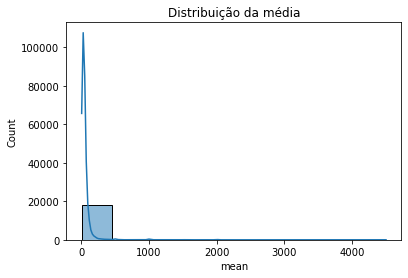

In [47]:
sns.histplot(df_seg['mean'], kde=True, bins=10).set(title='Distribuição da média')

count        mean  median     sum  mean_log
0      1   30.000000    30.0    30.0  3.401197
1      7   71.428571    80.0   500.0  4.268698
2     10  115.800000   100.0  1158.0  4.751865
3      1   20.000000    20.0    20.0  2.995732
4      2   50.000000    50.0   100.0  3.912023

[Text(0.5, 1.0, 'Distribuição normal da média com log')]

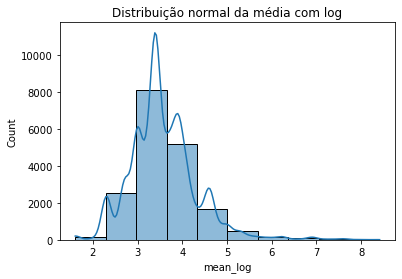

In [48]:
df_seg['mean_log'] = df_seg['mean'].apply(np.log)
display(df_seg.head())
sns.histplot(df_seg['mean_log'], kde=True, bins=10).set(title='Distribuição normal da média com log')

**3.2.1.2: Mediana (median)**

<AxesSubplot:xlabel='median', ylabel='Count'>

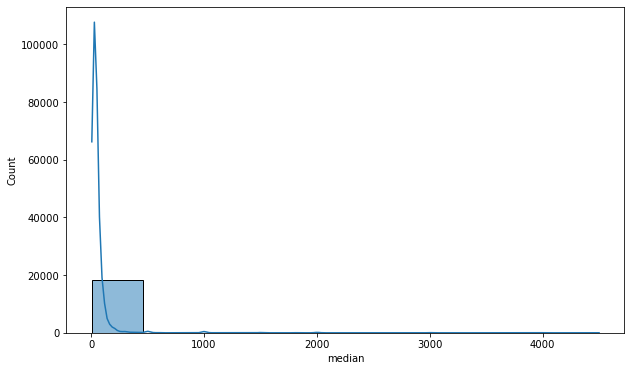

In [90]:
plt.figure(figsize=(10, 6))
sns.histplot(df_seg['median'], kde=True, bins=10)

<AxesSubplot:xlabel='median_log', ylabel='Count'>

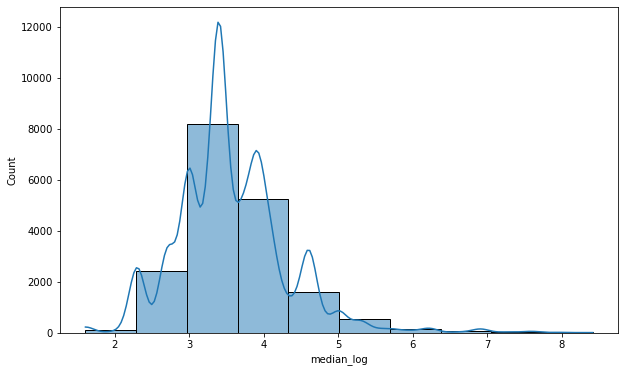

In [97]:
df_seg['median_log'] = df_seg['median'].apply(np.log)

plt.figure(figsize=(10, 6))
sns.histplot(df_seg['median_log'], kde=True, bins=10)

**3.2.1.3: Somatório (sum)**

<AxesSubplot:xlabel='sum', ylabel='Count'>

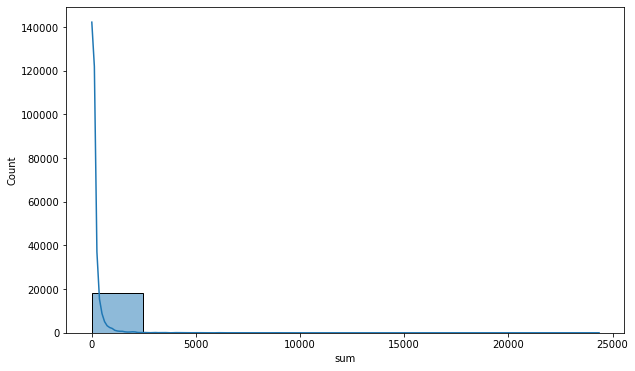

In [156]:
plt.figure(figsize=(10, 6))
sns.histplot(df_seg['sum'], kde=True, bins=10)

<AxesSubplot:xlabel='sum_log', ylabel='Count'>

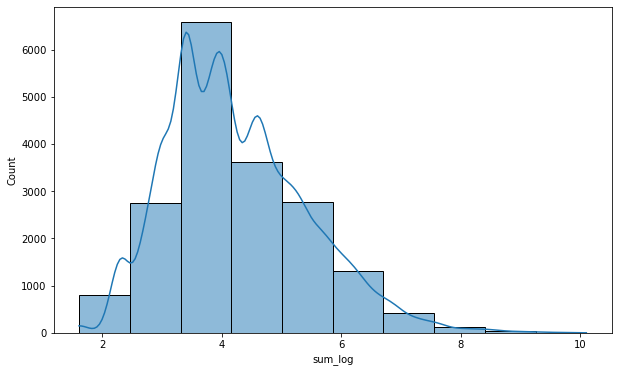

In [158]:
df_seg['sum_log'] = df_seg['sum'].apply(np.log)

plt.figure(figsize=(10, 6))
sns.histplot(df_seg['sum_log'], kde=True, bins=10)

<h3>3.2.2) Padronização e escala dos dados</h3>

In [160]:
df_seg.head()

count        mean  median     sum  mean_log  cluster  median_log   sum_log
0      1   30.000000    30.0    30.0  3.401197        2    3.401197  3.401197
1      7   71.428571    80.0   500.0  4.268698        1    4.382027  6.214608
2     10  115.800000   100.0  1158.0  4.751865        1    4.605170  7.054450
3      1   20.000000    20.0    20.0  2.995732        2    2.995732  2.995732
4      2   50.000000    50.0   100.0  3.912023        2    3.912023  4.605170

In [164]:
stand = StandardScaler()
columns = ['count', 'mean_log', 'median_log', 'sum_log']

df_seg_scale = stand.fit_transform(df_seg[columns])
df_seg_scale

array([[-0.60690881, -0.23580188, -0.22370658, -0.71836697],
       [ 1.43612529,  0.89438649,  1.05754724,  1.66882675],
       [ 2.45764235,  1.52386076,  1.34903888,  2.38143671],
       ...,
       [-0.60690881, -0.76404585, -0.75336423, -1.06240624],
       [-0.60690881,  0.52997243,  0.54411708, -0.21962691],
       [-0.60690881,  3.42953758,  3.45144199,  1.66882675]])

<h2>3.3) Técnicas de Clustering</h2>

<h3>3.3.1) Clustering Hierárquico</h3>

In [165]:
from sklearn.cluster import AgglomerativeClustering 
from sklearn.decomposition import PCA

In [183]:
n_clusters = 5

hc = AgglomerativeClustering(n_clusters = n_clusters, affinity = 'euclidean', linkage ='ward')
y_hc=hc.fit_predict(df_seg_scale)

df_seg['cluster_1'] = y_hc

In [185]:
df_seg.head(3)

count        mean  median     sum  mean_log  cluster  median_log   sum_log  \
0      1   30.000000    30.0    30.0  3.401197        2    3.401197  3.401197   
1      7   71.428571    80.0   500.0  4.268698        1    4.382027  6.214608   
2     10  115.800000   100.0  1158.0  4.751865        1    4.605170  7.054450   

   cluster_1  
0          1  
1          2  
2          2

In [184]:
fig = px.scatter(df_seg, x='mean', y='sum', color='cluster_1')

fig.update_layout(
    title='<span>Clusters de média por somatório</span>', 
    autosize=False,
    width=1200,
    height=600,
)

fig.show()

In [182]:
fig = px.scatter(df_seg, x='mean', y='count', color='cluster_1')

fig.update_layout(
    title='<span>Clusters de média por somatório</span>', 
    autosize=False,
    width=1200,
    height=600,
)

fig.show()

<h3>3.3.2) Clustering Hierárquico com PCA<h3>

In [189]:
pca_2_result

array([[-0.8306287 , -0.52999359],
       [ 2.42206478,  0.93635186],
       [ 3.62370235,  1.64246792],
       ...,
       [-1.60375185, -0.24715697],
       [ 0.29013722, -0.94001059],
       [ 4.53385989, -2.49251896]])

In [187]:
pca_2 = PCA(2)
pca_2_result = pca_2.fit_transform(df_seg_scale)

n_clusters = 5
hc_pca = AgglomerativeClustering(n_clusters = n_clusters, affinity = 'euclidean', linkage ='ward')
y_hc_pca=hc_pca.fit_predict(pca_2_result)

df_seg['cluster_pca'] = y_hc_pca

In [201]:
pca_2_result.transpose()

array([[-0.8306287 ,  2.42206478,  3.62370235, ..., -1.60375185,
         0.29013722,  4.53385989],
       [-0.52999359,  0.93635186,  1.64246792, ..., -0.24715697,
        -0.94001059, -2.49251896]])

In [205]:
fig = px.scatter(x=pca_2_result.transpose()[0], y=pca_2_result.transpose()[1], color=y_hc_pca)

fig.update_layout(
    title='<span>Dados Clusterizados (Hierarchical Clustering Model - PCA)</span>', 
    autosize=False,
    width=1000,
    height=600,
    xaxis=dict(title='<span>PCA 1</span>'),
    yaxis=dict(title='<span>PCA 2</span>')
)

fig.show()

In [208]:
df_seg.loc[df_seg['cluster_1'] == df_seg['cluster_pca']]

count       mean  median    sum  mean_log  cluster  median_log  \
1          7  71.428571    80.0  500.0  4.268698        1    4.382027   
3          1  20.000000    20.0   20.0  2.995732        2    2.995732   
10         1  15.000000    15.0   15.0  2.708050        2    2.708050   
12         7  77.857143    60.0  545.0  4.354876        1    4.094345   
13         1  15.000000    15.0   15.0  2.708050        2    2.708050   
...      ...        ...     ...    ...       ...      ...         ...   
18404      1  20.000000    20.0   20.0  2.995732        2    2.995732   
18406      1  10.000000    10.0   10.0  2.302585        2    2.302585   
18408      1  16.000000    16.0   16.0  2.772589        2    2.772589   
18412      1  10.000000    10.0   10.0  2.302585        2    2.302585   
18414      1  20.000000    20.0   20.0  2.995732        2    2.995732   

        sum_log  cluster_1  cluster_pca  
1      6.214608          2            2  
3      2.995732          3            3  
10     2.708050          3            3  
12     6.300786          2            2  
13     2.708050          3            3  
...         ...        ...          ...  
18404  2.995732          3            3  
18406  2.302585          3            3  
18408  2.772589          3            3  
18412  2.302585          3            3  
18414  2.995732          3            3  

[5204 rows x 10 columns]

In [76]:
sns.scatterplot()

In [77]:
df_seg

count        mean  median     sum  mean_log  cluster
0          1   30.000000    30.0    30.0  3.401197        2
1          7   71.428571    80.0   500.0  4.268698        1
2         10  115.800000   100.0  1158.0  4.751865        1
3          1   20.000000    20.0    20.0  2.995732        2
4          2   50.000000    50.0   100.0  3.912023        2
...      ...         ...     ...     ...       ...      ...
18412      1   10.000000    10.0    10.0  2.302585        2
18413      1   50.000000    50.0    50.0  3.912023        2
18414      1   20.000000    20.0    20.0  2.995732        2
18415      1   54.000000    54.0    54.0  3.988984        2
18416      1  500.000000   500.0   500.0  6.214608        1

[18417 rows x 6 columns]